In [1]:
import jax
import jax.numpy as np

import numpyro
import numpyro.distributions as dist

import matplotlib.pyplot as plt

import os
import sys
parent = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(parent)

from models import ExponentialRandomWalk

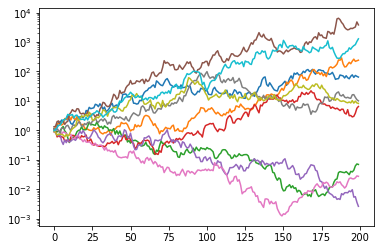

In [49]:
num_steps = 200

drift_scale = 2e-2
rw_scale = 2e-1
loc = 1.

n = 10
with numpyro.handlers.seed(rng_seed=2):
    with numpyro.plate("rep", n):
        drift = numpyro.sample("drift", dist.Normal(0, drift_scale))[:, None]
        d = ExponentialRandomWalk(loc=1., scale=rw_scale, drift=drift, num_steps=num_steps)
        x = numpyro.sample("x", d, sample_shape=(n,))
    
plt.plot(x.T)
plt.yscale('log')
plt.show()